### Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,no of dependents ,smoker ,region  medical insurance is calculated .

Columns                                            
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('medical_cost_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data has both categorical and numerical variables

In [4]:
df.shape

(1338, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

It has int, float and object datatypes

In [7]:
for cols in df:
    print(df[cols].value_counts())
    print('\n')

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex
male      676
female    662
Name: count, dtype: int64


bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


charges
1639.56310     2
16884.92400    1
29

We find the frequency of each unique data point in valuecounts from dataset df

In [8]:
# Checking nunique values for df

columns_to_check = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

for column_name in columns_to_check:
    unique_values = df[column_name].nunique()
    print(f"Column: {column_name}, Number of Unique Values: {unique_values}\n")


Column: age, Number of Unique Values: 47

Column: sex, Number of Unique Values: 2

Column: bmi, Number of Unique Values: 548

Column: children, Number of Unique Values: 6

Column: smoker, Number of Unique Values: 2

Column: region, Number of Unique Values: 4

Column: charges, Number of Unique Values: 1337



In [9]:
# Checking for Categorical column
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print('\n')

# Check for numerical column:
numerical_col = []
for i in df.dtypes.index:
    if df[i].dtypes !='object':
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)
        

Categorical Columns:  ['sex', 'smoker', 'region']


Numerical Columns:  ['age', 'bmi', 'children', 'charges']


From the observation of value_counts and nunique and code above:
    categorical data : sex, children, region,smoker
    numerical data: age, charges,bmi

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- It gives RangeIndex of dataset = 1338
- Total columns 7
- Memory usage = 73.3 KB
- dtypes: float64(2), int64(2), object(3)

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The data do not contain null values

In [12]:
df.duplicated().sum()

1

Data has one duplicate row

In [13]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:",duplicate_rows)


# Find all rows with the same values as row 581
other_duplicates = df[df.duplicated(subset=df.columns, keep=False,)]
other_duplicates = other_duplicates[other_duplicates.index != 581]
print("Other Duplicated Rows:",other_duplicates)


Duplicate Rows:      age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631
Other Duplicated Rows:      age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631


We observed row 581 and row 195 are duplicates

In [14]:
df = df.drop_duplicates(keep='last')

We reove the first duplicate row and keep the last row

In [15]:
df.duplicated().sum()

0

No more duplicates in the data

In [16]:
df.shape

(1337, 7)

Shape reduced from 1338 to 1337

In [17]:
for col in ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']:
    has_blank_space = df[col].apply(lambda x: ' ' in str(x))
    print(f"Column: {col}, Contains Blank Spaces: {has_blank_space.any()}")


Column: age, Contains Blank Spaces: False
Column: sex, Contains Blank Spaces: False
Column: bmi, Contains Blank Spaces: False
Column: children, Contains Blank Spaces: False
Column: smoker, Contains Blank Spaces: False
Column: region, Contains Blank Spaces: False
Column: charges, Contains Blank Spaces: False


No blank spaces in the data

In [18]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


- Mean and median is almost same so data is noramlly distributed in case of age,bmi,children
- Charges columns might be skewed
- The children variable std is slightly bigger than mean, not a good sign
- Difference between third quartile and max is reasonable in all variable other than charges column

In [19]:
# Checking number of unique values in each column
df.nunique().to_frame('No: of unique values')

,No: of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


Above table shows nunique values in each variable

### EDA  Analysis through countplot for categorical data

sex
male      675
female    662
Name: count, dtype: int64

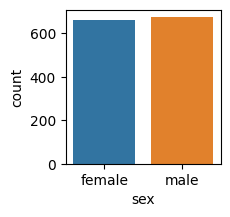

In [20]:
plt.figure(figsize=(2,2))
sns.countplot(data=df, x='sex')
df['sex'].value_counts()

male count is slightly higher than female count in sex variable, dataset is  well balanced

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

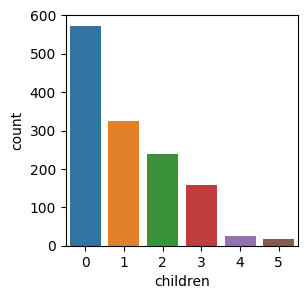

In [21]:
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='children')
df['children'].value_counts()

- 573 individuals have 0 children 
- 324 individuals have 1 children
- 240 individuals have 2 children 
- 157 individuals have 3 children 
- 25 individuals  have 4 children 
- 18 individuals  have 5 dependents 
- the range of dependents from 0 to 5 is drastically decreasing

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

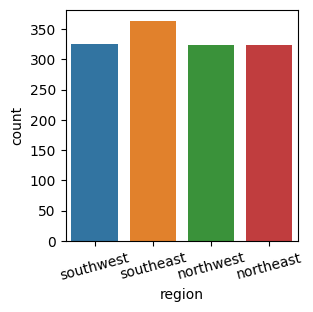

In [22]:
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='region')
plt.xticks(rotation =15)
df['region'].value_counts()

southeast region individuals are slightly more in number compared from other regions

smoker
no     1063
yes     274
Name: count, dtype: int64

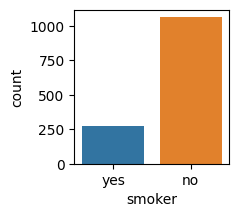

In [23]:
plt.figure(figsize=(2,2))
sns.countplot(data=df, x='smoker')
df['smoker'].value_counts()

Non smokers are high in number than smokers, the ratio is quite distinct

### Bivariate Analysis

<Axes: xlabel='sex', ylabel='charges'>

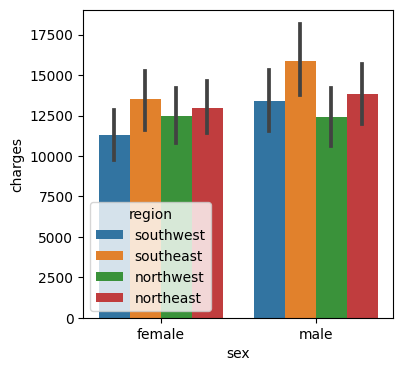

In [24]:
plt.figure(figsize=(4,4))
sns.barplot(data = df, x='sex',y = 'charges',hue = 'region')

The Female and male  individuals from southeast are being charged with high insurance charges compared to other zones

<Axes: xlabel='smoker', ylabel='charges'>

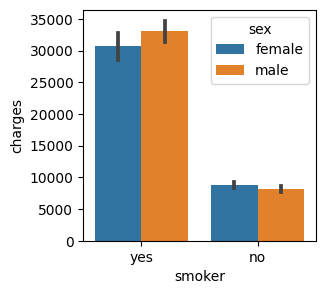

In [25]:
plt.figure(figsize=(3,3))
sns.barplot(data=df, x ='smoker', y = 'charges', hue = 'sex')

smokers insurances charges, are higher than non smokers

<Axes: xlabel='age', ylabel='charges'>

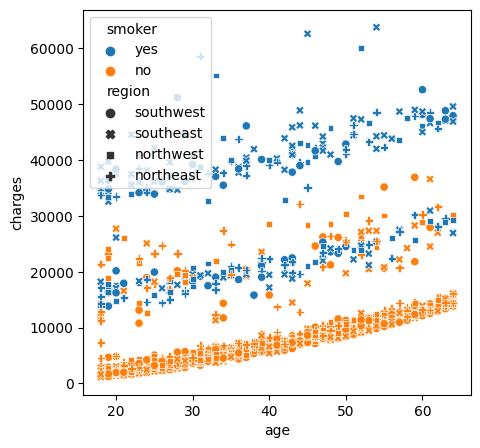

In [26]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='age', y = 'charges', hue = 'smoker', style = 'region', data=df)

As the age increases the insurance charges are increasing
and the smokers will have the high premium charges among other individuals

<Axes: xlabel='bmi', ylabel='charges'>

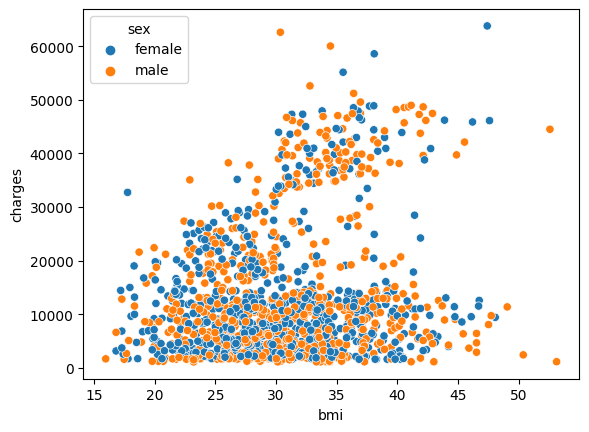

In [27]:
sns.scatterplot(data=df, x='bmi', y = 'charges', hue = 'sex')

Noraml BMI Range is around 18.5 to 24.9
Most of the people are obese in range of 25 to 40 
The bmi around 35 to 45 have high medical insurance charges

### Analyse Data distribution

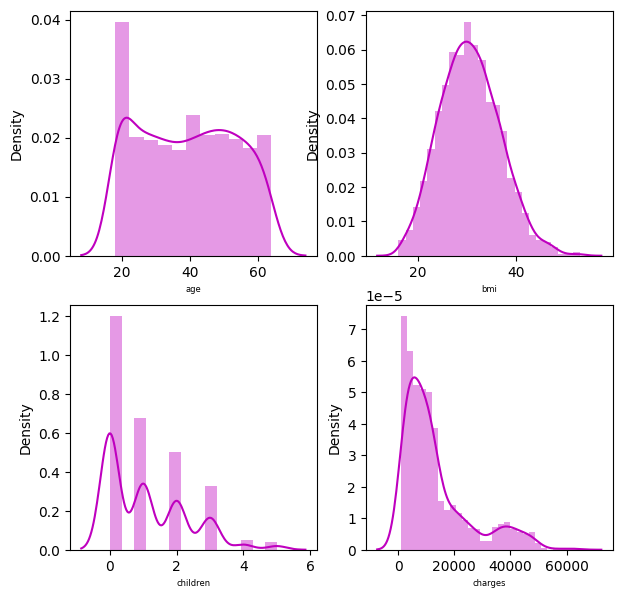

In [28]:
plt.figure(figsize=(7,7),facecolor='white')
plotnumber=1

for col in numerical_col:
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color = 'm')
        plt.xlabel(col, fontsize=6)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.show()

- Charges have righ skewed distribution
- Age has almost normally distributed data
- bmi using  has values i exponent form may be sliglty skewed
- children data is also skewed

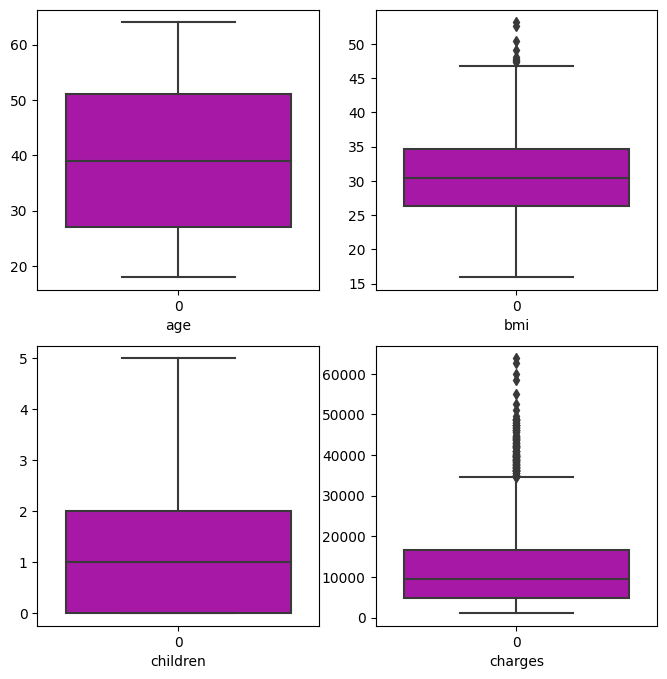

In [29]:
plt.figure(figsize=(8,8),facecolor='white')
plotnumber=1

for col in numerical_col:
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],color = 'm')
        plt.xlabel(col, fontsize=10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.show()

Bmi and charges have outliers in the data, these cannot be extreme values as in real life scenarios, they is a possibility of have high bmi and high charges, to get best performanc of the model lets remove these outliers

### Remove outliers from bmi

In [30]:
upper_limit = df['bmi'].mean() + 3 * df['bmi'].std()
lower_limit = df['bmi'].mean() - 3 * df['bmi'].std()

In [31]:
df['bmi'] = np.where(
         df['bmi'] >upper_limit,
         upper_limit,
         np.where(df['bmi'] < lower_limit,
         lower_limit,
         df['bmi'])
)

In [32]:
df.shape

(1337, 7)

<Axes: >

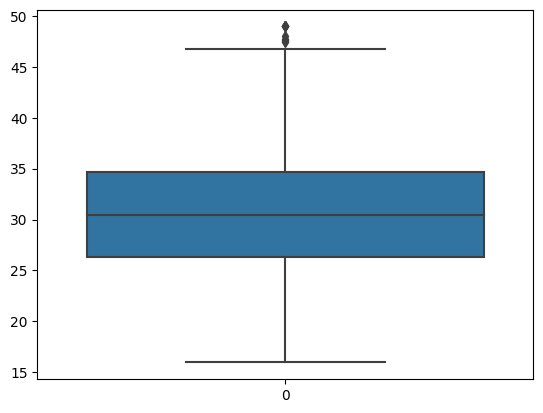

In [33]:
sns.boxplot(df['bmi'])

Outliers are adjusted successfully by capping without loss of data

### ### Remove outliers from charges target variable

In [34]:
upper_limit = df['charges'].mean() + 3 * df['charges'].std()
lower_limit = df['charges'].mean() - 3 * df['charges'].std()

In [35]:
df['charges'] = np.where(
         df['charges'] >upper_limit,
         upper_limit,
         np.where(df['charges'] < lower_limit,
         lower_limit,
         df['charges'])
)

In [36]:
df.shape

(1337, 7)

<Axes: >

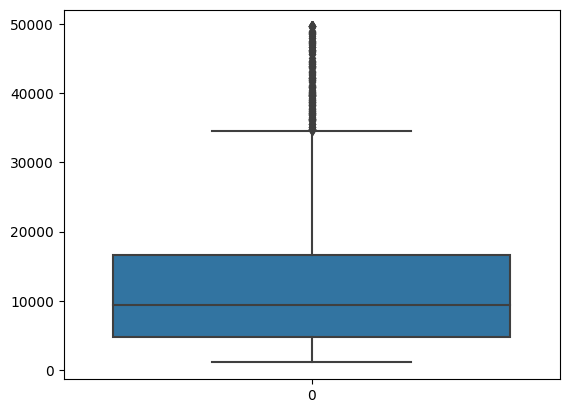

In [37]:
sns.boxplot(df['charges'])

Outliers are adjusted successfully by capping without loss of data

### Encoding the data

In [38]:
df.replace({'sex':{'male':0,'female':1}}, inplace=True)
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [39]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


All the categorical data is encoded into numerical vaues ranging from 0,1

### Checking for skweness

In [40]:
df.skew()

age         0.054781
sex         0.019469
bmi         0.253043
children    0.937421
smoker     -1.463601
region      0.050219
charges     1.452583
dtype: float64

In [41]:
# Removing skewness using cuberoot method
df['charges'] = np.cbrt(df['charges'])

In [42]:
df.skew()

age         0.054781
sex         0.019469
bmi         0.253043
children    0.937421
smoker     -1.463601
region      0.050219
charges     0.498441
dtype: float64

skewness is reduced in case of charges

<Axes: xlabel='charges', ylabel='Density'>

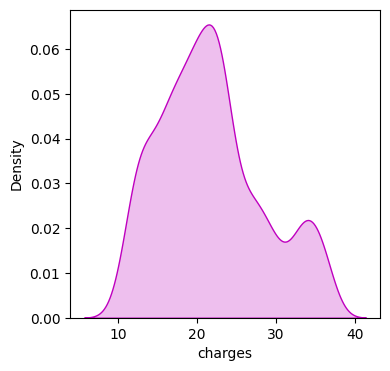

In [43]:
plt.figure(figsize=(4,4))
sns.distplot(df['charges'],color ='m',kde_kws ={'shade':True}, hist  = False)

skewness is almost removed from charges column

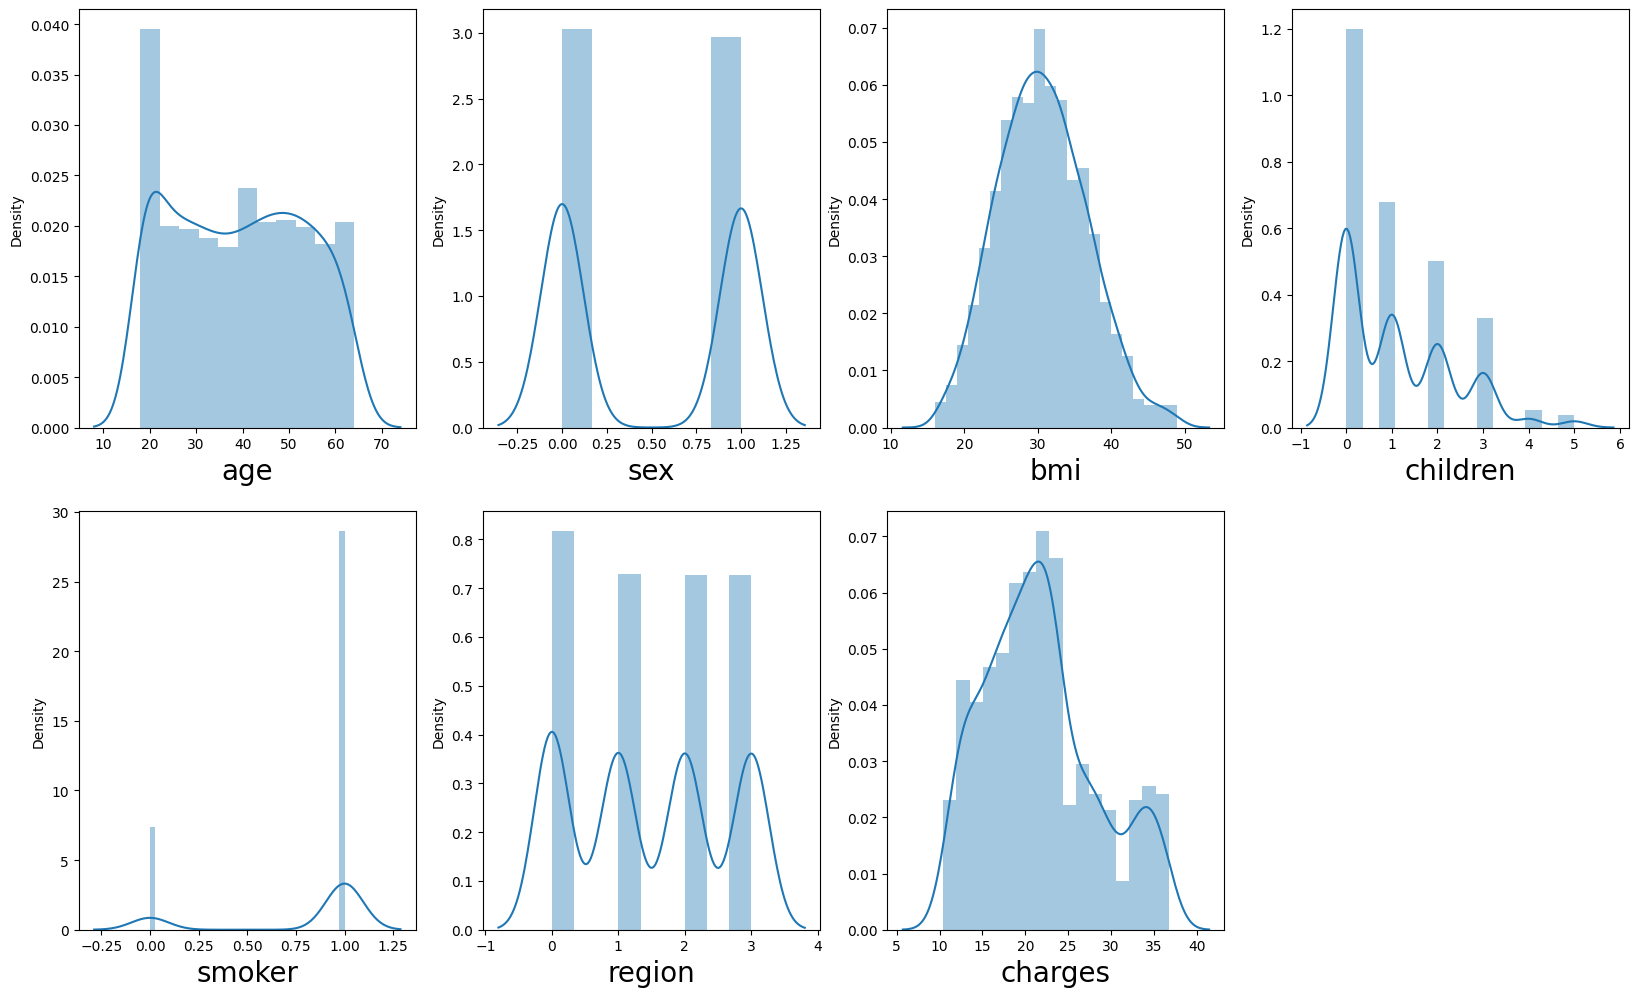

In [44]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber <= 13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber+=1
plt.show()

### Multicollinearity issue

In [45]:
corr = df.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111262,0.041536,0.025587,0.006691,0.451461
sex,0.019814,1.000000,-0.045439,-0.017848,0.076596,0.017150,-0.028845
bmi,0.111262,-0.045439,1.000000,0.013329,-0.003238,-0.261514,0.156183
children,0.041536,-0.017848,0.013329,1.000000,-0.007331,0.020206,0.123949
smoker,0.025587,0.076596,-0.003238,-0.007331,1.000000,0.053454,-0.732434
region,0.006691,0.017150,-0.261514,0.020206,0.053454,1.000000,-0.023134
charges,0.451461,-0.028845,0.156183,0.123949,-0.732434,-0.023134,1.000000


Multicollinearity is not seen in the dataset, any how  lets get confirmed by further processing

In [46]:
corr['charges'].sort_values(ascending=False)

charges     1.000000
age         0.451461
bmi         0.156183
children    0.123949
region     -0.023134
sex        -0.028845
smoker     -0.732434
Name: charges, dtype: float64

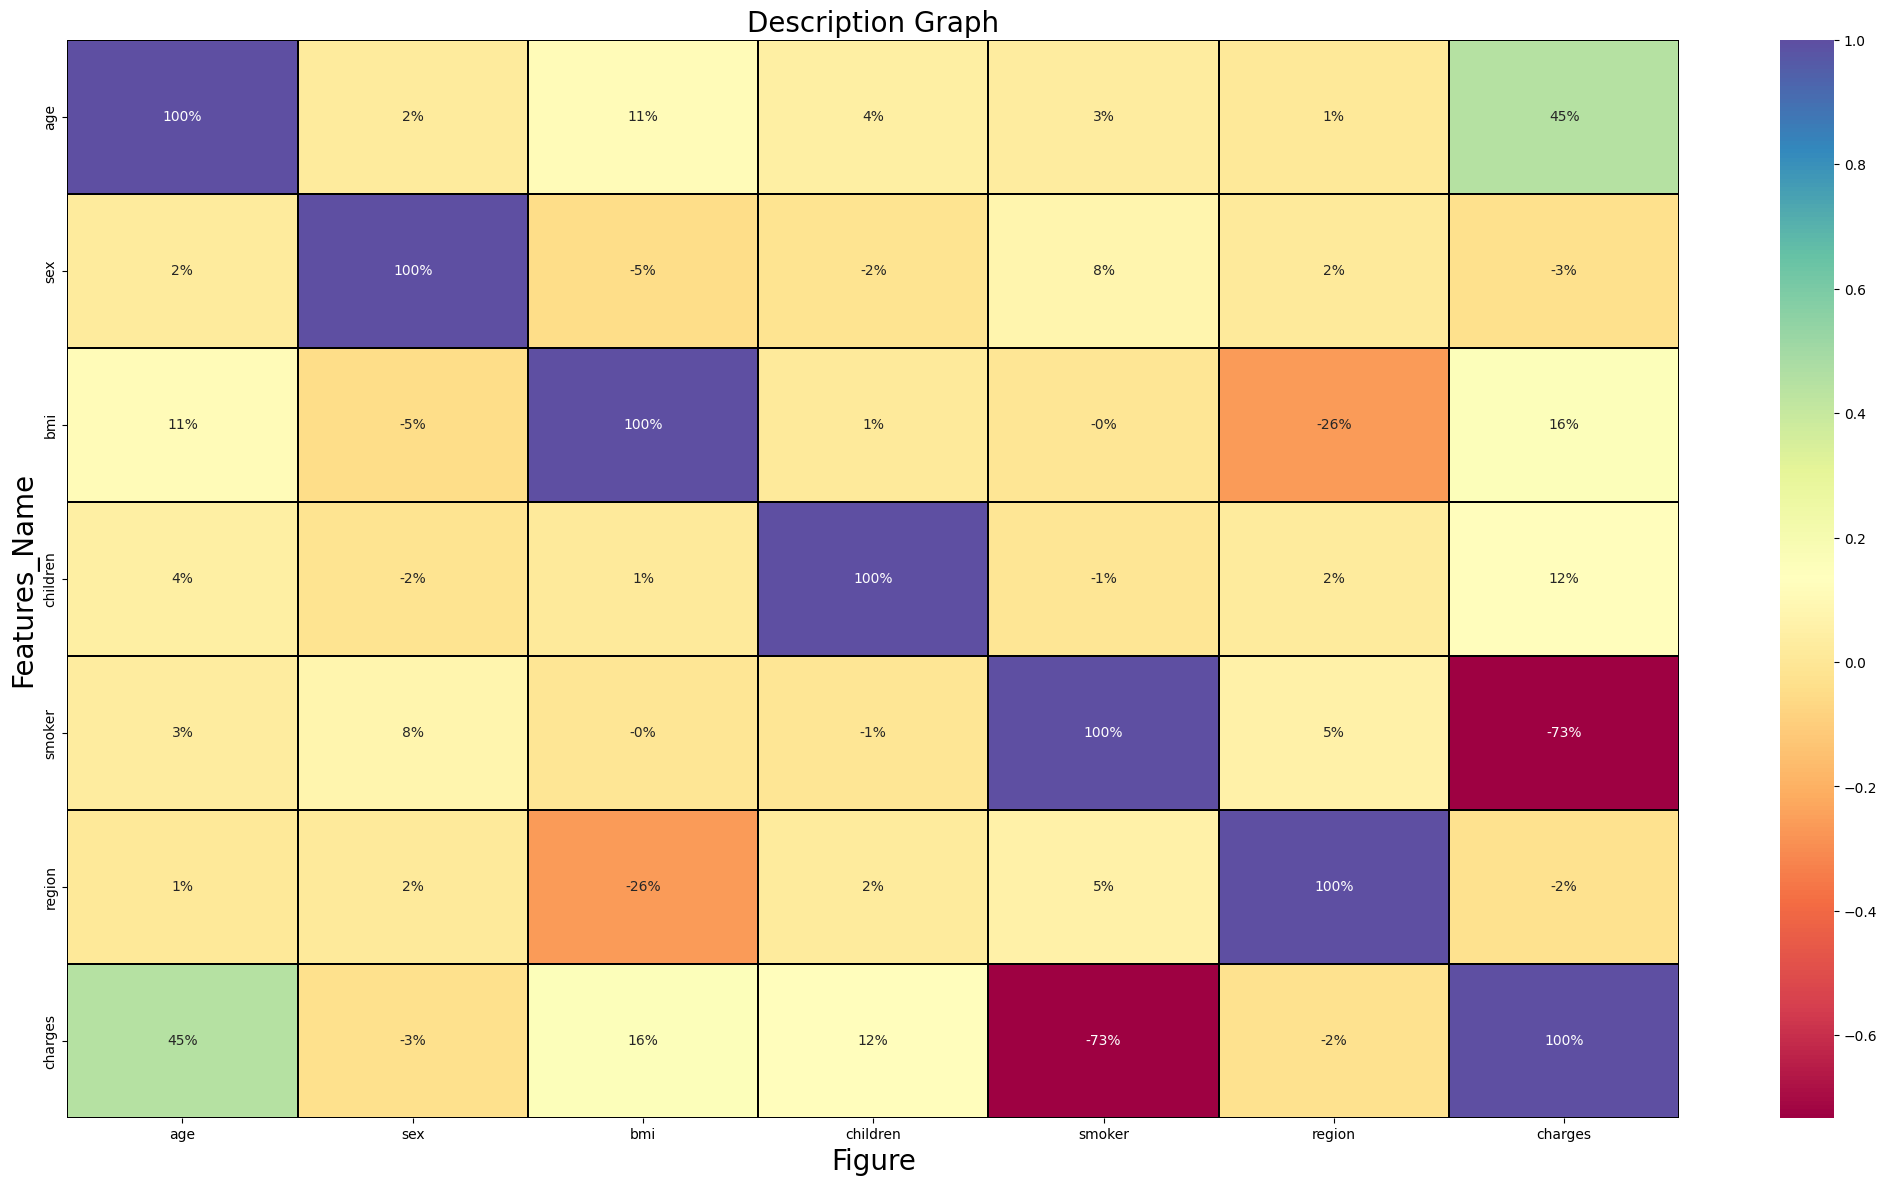

In [47]:
plt.figure(figsize = (26,14))
sns.heatmap(df.corr(), linewidths=0.2, fmt = '.0%', linecolor ='black', annot = True, cmap = 'Spectral')
plt.xlabel('Figure', fontsize = 20)
plt.ylabel('Features_Name', fontsize =20)
plt.title('Description Graph', fontsize = 20)
plt.show()

from heat map we understand smokers and charges are highly corelated ie 79% with each other

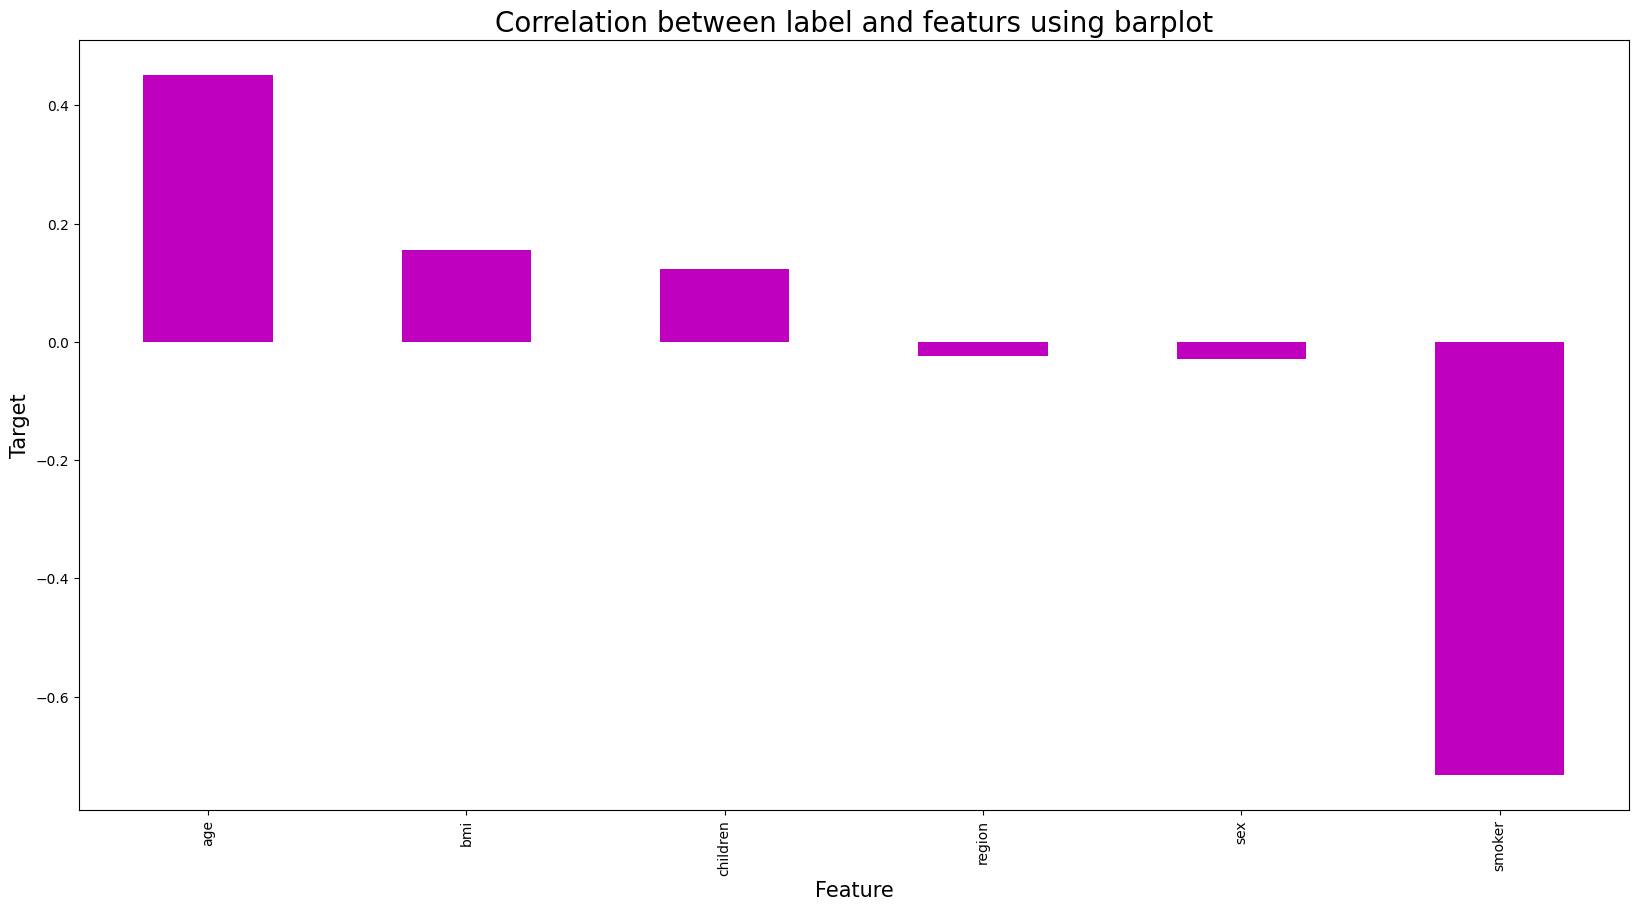

In [48]:
plt.figure(figsize = (20,10))
df.corr()['charges'].sort_values(ascending = False).drop(['charges']).plot(kind='bar',color = 'm')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize =15)
plt.title('Correlation between label and featurs using barplot', fontsize = 20)
plt.show()

age and smoker is more correlated with the target

### Lets split and Standardize the data

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [51]:
X = df.drop(columns=['charges'],axis=1)
y=df['charges']

In [52]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [53]:
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.440418,1.009771,-0.453723,-0.909234,-1.969660,-0.402398
1,-1.511647,-0.990324,0.512485,-0.079442,0.507702,-1.287277
2,-0.799350,-0.990324,0.385742,1.580143,0.507702,-1.287277
3,-0.443201,-0.990324,-1.308825,-0.909234,0.507702,1.367359
4,-0.514431,-0.990324,-0.292414,-0.909234,0.507702,1.367359
...,...,...,...,...,...,...
1332,0.767704,-0.990324,0.051602,1.580143,0.507702,1.367359
1333,-1.511647,1.009771,0.207973,-0.909234,0.507702,0.482481
1334,-1.511647,1.009771,1.019456,-0.909234,0.507702,-1.287277
1335,-1.297958,1.009771,-0.799385,-0.909234,0.507702,-0.402398


In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,1.016709,age
1,1.008829,sex
2,1.090903,bmi
3,1.002747,children
4,1.009441,smoker
5,1.078601,region


vif is within the range and we are not doscarding any column or feature

In [55]:
max_acc=0
max_rs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    
    if acc > max_acc:
        max_acc = acc
        max_rs = i
print('Maximum r2score is ', max_acc, 'on random_state', max_rs)

Maximum r2score is  0.8422819585267046 on random_state 129


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state = max_rs)

In [57]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_RFR))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 96.9466652352414
R2_score on test data: 0.8587415115568547
Mean Absolute Error: 1.4261518493558762
Mean Squared Error: 6.8974973383934195
Root Mean Squared Error: 2.626308690613771


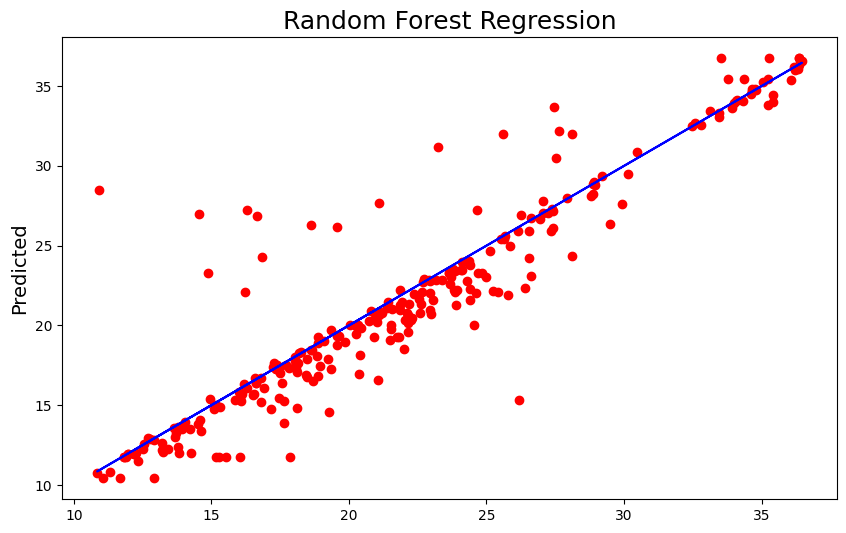

In [58]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_RFR, y=y_test, color = 'r')
plt.plot(pred_RFR,pred_RFR,color = 'b')
plt.ylabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Random Forest Regression', fontsize = 18)
plt.show()

In [59]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('R2_score:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_knn))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 85.13812299832271
R2_score on test data: 0.8493017983730371
Mean Absolute Error: 1.579419600565049
Mean Squared Error: 7.358428198394699
Root Mean Squared Error: 2.7126422909028567


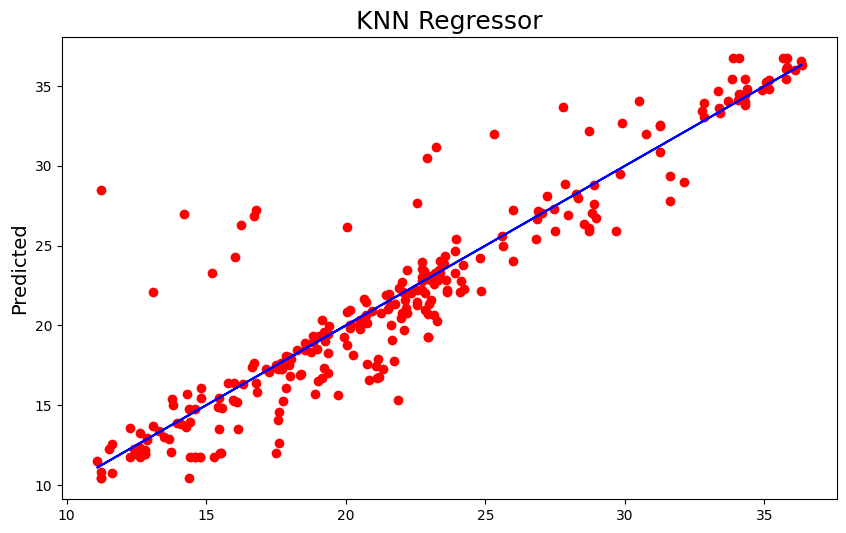

In [60]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_knn, y=y_test, color = 'r')
plt.plot(pred_knn,pred_knn,color = 'b')
plt.ylabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('KNN Regressor', fontsize = 18)
plt.show()

In [61]:
GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print('R2_score:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_GBR))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 87.5607720119185
R2_score on test data: 0.8890318833956176
Mean Absolute Error: 1.3060622686972359
Mean Squared Error: 5.4184516439401325
Root Mean Squared Error: 2.3277567836739586


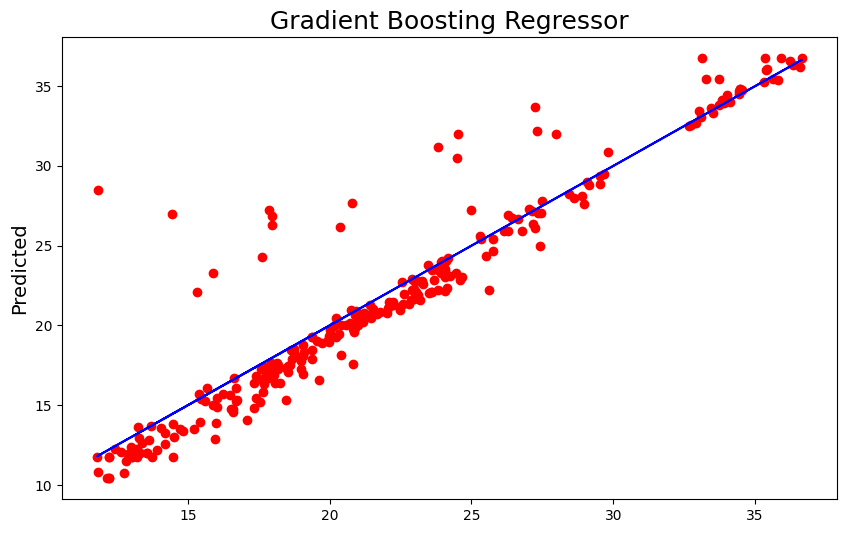

In [62]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_GBR, y=y_test, color = 'r')
plt.plot(pred_GBR,pred_GBR,color = 'b')
plt.ylabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Gradient Boosting Regressor', fontsize = 18)
plt.show()

In [63]:
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print('R2_score:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_svr))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score: 80.38679292805868
R2_score on test data: 0.8773240982817754
Mean Absolute Error: 1.051910807628574
Mean Squared Error: 5.990129973159344
Root Mean Squared Error: 2.447474202756659


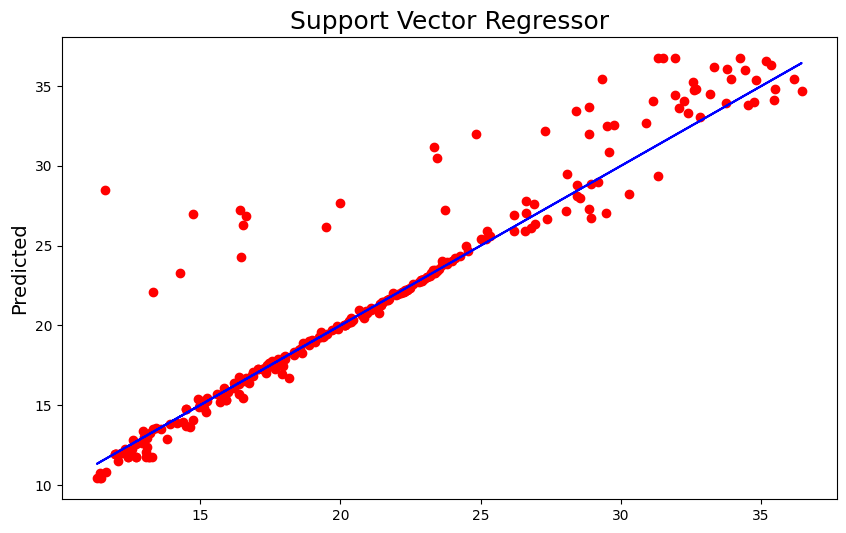

In [64]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_svr, y=y_test, color = 'r')
plt.plot(pred_svr,pred_svr,color = 'b')
plt.ylabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Support Vector Regressor', fontsize = 18)
plt.show()

In [65]:
ETR = ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred_ETR = ETR.predict(x_test)
pred_train = ETR.predict(x_train)
print('R2_score:',r2_score(y_train,pred_train)*100)
print('R2_score on test data:',r2_score(y_test,pred_ETR))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ETR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ETR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ETR)))

R2_score: 99.58607167895407
R2_score on test data: 0.8404231592182384
Mean Absolute Error: 1.4212563469609831
Mean Squared Error: 7.791962427832727
Root Mean Squared Error: 2.7914086816216517


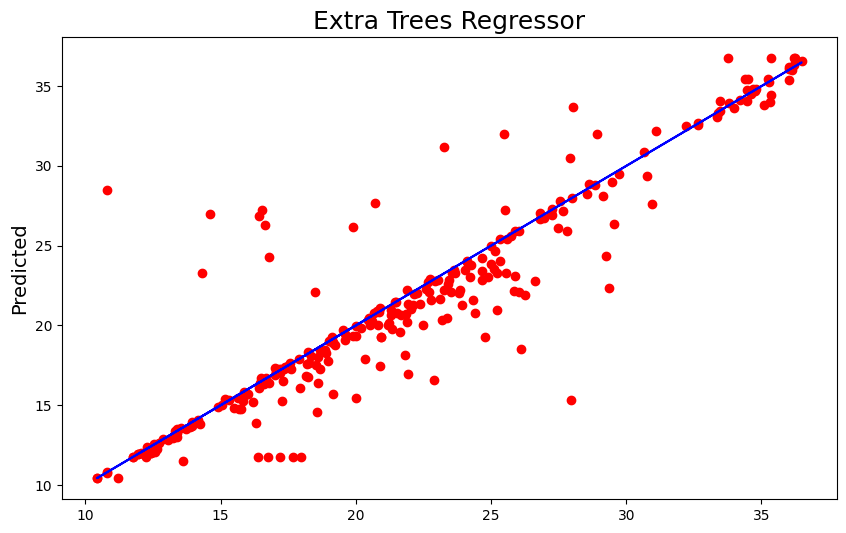

In [66]:
plt.figure(figsize = (10,6))
plt.scatter(x = pred_ETR, y=y_test, color = 'r')
plt.plot(pred_ETR,pred_ETR,color = 'b')
plt.ylabel('Actual', fontsize =14)
plt.ylabel('Predicted', fontsize =14)
plt.title('Extra Trees Regressor', fontsize = 18)
plt.show()

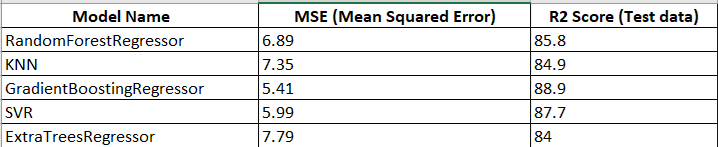

### Cross Validation Score

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
score1 = cross_val_score(RFR,x,y)
print(score1)
print('RFR score:',score1.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.84126034 0.71613485 0.8648516  0.81694084 0.81030336]
RFR score: 0.809898198431898
Difference between R2 score and cross validation is:  4.8843313124956715


In [69]:
score2 = cross_val_score(knn,x,y)
print(score2)
print('KNN score:',score2.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_knn)-score2.mean())*100)

[0.83921721 0.70427307 0.84889315 0.80568566 0.79672582]
KNN score: 0.79895898084285
Difference between R2 score and cross validation is:  5.0342817530187105


In [70]:
score3 = cross_val_score(GBR,x,y)
print(score3)
print('GBR score:',score3.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_GBR)-score3.mean())*100)

[0.86428828 0.74495318 0.89684234 0.83909483 0.82670237]
GBR score: 0.834376198101414
Difference between R2 score and cross validation is:  5.465568529420361


In [71]:
score4 = cross_val_score(svr,x,y)
print(score4)
print('SVR score:',score4.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_svr)-score4.mean())*100)

[0.87068776 0.72129306 0.87653966 0.81059825 0.79447389]
SVR score: 0.8147185243093247
Difference between R2 score and cross validation is:  6.26055739724507


In [72]:
score5 = cross_val_score(ETR,x,y)
print(score5)
print('ETR score:',score5.mean())
print('Difference between R2 score and cross validation is: ',(r2_score(y_test,pred_svr)-score5.mean())*100)

[0.80894317 0.68339217 0.84421864 0.79317307 0.79866704]
ETR score: 0.7856788166662158
Difference between R2 score and cross validation is:  9.164528161555962


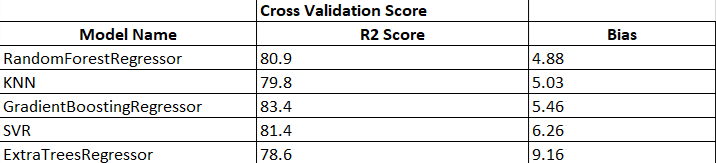

### HyperParameter Tuning

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
grid_param = {'max_depth': range(4,8),           
          'min_samples_split':range(2,8,2),
          'learning_rate': np.arange(0.1,0.3)}

grid = GridSearchCV(GradientBoostingRegressor(),param_grid=grid_param)
grid.fit(x_train,y_train)

print('best params :', grid.best_params_)        

best params : {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 6}


In [75]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 6}

In [76]:
Model = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 4, min_samples_split= 6,ccp_alpha=0.0, criterion='friedman_mse',
                                  max_features=None,max_leaf_nodes=8,min_impurity_decrease=0.0,min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0,random_state=129)


In [77]:
Model.fit(x_train,y_train)
pred = Model.predict(x_test)

print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.8856508876479396
Mean Absolute Error: 1.316153896014659
Mean Squared Error: 5.58354196472545
Root Mean Squared Error: 2.36295195988523


In [78]:
import pickle
filename = 'Medical_insurance.pkl'
pickle.dump(Model,open(filename,'wb')) 

In [79]:
import pickle
loaded_model = pickle.load(open('Medical_insurance.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

88.56508876479397


In [80]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predcited','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
Predcited,13.478741,21.194398,33.223478,21.131099,20.429922,23.000033,35.468116,20.054341,14.094960,27.219788,...,23.410536,11.888820,23.118132,21.624167,14.754513,23.772052,13.671587,35.019748,23.611736,20.665622
Original,12.035115,20.228645,35.459375,19.769737,26.173058,21.595969,35.410249,19.260370,13.569218,27.052506,...,22.228002,10.434025,22.858995,20.970785,13.381395,23.760959,11.776042,34.746259,22.108854,20.023280
